# XPRESStools Notebook 
- This test notebook can be used to perform analysis on a dataset.   
- Follow the instructions above each code block to know when and how to modify aspects of the analysis    
- A block of code can be executed in Jupyter notebook by selecting the block and pressing Shift + Enter
- IMPORTANT: If you re-run a previous block of code, already created variables are stored, so it important to run this linearly    
- Please refer to the [documentation](https://xpresstools.readthedocs.io/en/latest/) for further instructions

# Preparing Data

### Import libraries 
- XPRESStools can be installed by executing ```pip install xpresstools``` in the command line   
- The ```%matplotlib inline``` command allows figures to be displayed inline in Jupyter notebook

In [1]:
import os
import pandas as pd 
import numpy as np
import xpressplot as xp
%matplotlib inline

### Variables
- Modify variables such as data path, file names, etc here.  
- More information on how custom datasets should be formatted can be found [here](https://xpresstools.readthedocs.io/en/latest/content/general-usage.html)

In [2]:
#Modify this path to specify file location and name 
#IMPORTANT: this path must end with a forward slash character as shown below
file_name = './tests/test_data.txt'

### Import dataset

In [3]:
data = xp.get_df(file_name, delimiter='\t')
metadata = xp.get_info('./tests/test_info.txt')

- We can look at the data by applying the `.head()` function to a dataframe

In [4]:
data.head()

,SRR1795409,SRR1795410,SRR1795411,SRR1795412,SRR1795413,SRR1795414,SRR1795415,SRR1795416,SRR1795417,SRR1795418,...,SRR1795431,SRR1795432,SRR1795433,SRR1795434,SRR1795435,SRR1795436,SRR1795437,SRR1795438,SRR1795439,SRR1795440
ENSG00000000003,416,514,457,416,498,419,341,216,384,404,...,341,197,260,176,148,154,394,292,441,304
ENSG00000000005,2,0,1,0,0,2,0,4,2,1,...,0,0,0,0,0,0,0,0,0,0
ENSG00000000419,435,524,484,462,546,433,330,287,365,360,...,734,416,562,448,345,273,866,692,931,652
ENSG00000000457,201,237,237,166,205,155,188,134,151,170,...,75,28,46,38,31,30,72,50,73,46
ENSG00000000460,642,701,607,514,788,559,538,463,580,560,...,334,224,258,228,197,150,408,309,488,324


In [5]:
metadata.head()

,0,1
0,SRR1795409,rna_untr
1,SRR1795410,rna_untr
2,SRR1795411,rna_untr
3,SRR1795412,rna_untr
4,SRR1795413,rna_isrib


### Clean up the data
- For this dataset, we only want to compare normal colon and adenomous colon expression, so we create a dataframe with just those samples and run a basic clean-up function to remove Null values, etc.   
- Print functions have also been included to show the size of the dataframe before and after this code block is run

In [6]:
#Get normal and adenoma samples
data = xp.keep_labels(data, metadata, label_list=['ribo_untr','ribo_tm',])

#Print some info
print('Dataframe size before cleaning: ' + str(data.shape))

#Clean up dataset of missing values
data = xp.clean_df(data)

print('Dataframe size after cleaning: ' + str(data.shape))

Dataframe size before cleaning: (20018, 8)
Dataframe size after cleaning: (20018, 8)


In [7]:
data.columns

Index(['SRR1795425', 'SRR1795426', 'SRR1795427', 'SRR1795428', 'SRR1795433',
       'SRR1795434', 'SRR1795435', 'SRR1795436'],
      dtype='object')

### Rename genes
- Let's rename the gene ids to the common gene names 
- You will need an Ensembl GTF file which can be downloaded <a href='ftp://ftp.ensembl.org/pub/release-97/gtf/homo_sapiens/Homo_sapiens.GRCh38.97.gtf.gz'>here</a> for human 
- If you are using a different model organism, you will need to download the appropriate GTF file

In [11]:
#Location of GTF reference file
gtf_ref = '~/Desktop/reference/Homo_sapiens.GRCh38.96.gtf'

In [12]:
data = xp.convert_names(
    data,
    gtf_ref)

### Sample Normalization (RNA-seq)
- If running MicroArray data, signal must be normalized using a software tool such as Alt Analyze
- If running an RNAseq dataset, samples need to be normalized based on the number of reads in each
    - See the [documentation](https://xpresstools.readthedocs.io/en/latest/content/normalize.html) for more information
    - The code blocks below will perform RPKM normalization on single-end read RNAseq data
    - The first of these code blocks will set the variable for the location and file name of the appropriate [Ensembl GTF reference file](https://uswest.ensembl.org/index.html)
- GTF file format will vary slightly from organism to organism, and at times the character sequence needed to be searched will vary. More information can be found in the [documentation](https://xpresstools.readthedocs.io/en/latest/content/normalize.html)
- If samples were sequenced in multiple batches, it is recommended using XPRESStools's [batch_normalize](https://xpresstools.readthedocs.io/en/latest/content/normalize.html#batch-normalize) function

In [13]:
# Choose from rpm(), tpm(), rpkm(), or fpkm(). All require a GTF file aside from rpm()
data_tpm = xp.tpm(
    data, 
    gtf_ref)

In [14]:
data_tpm.head()

,SRR1795425,SRR1795426,SRR1795427,SRR1795428,SRR1795433,SRR1795434,SRR1795435,SRR1795436
TSPAN6,57.347788,62.125560,58.259959,69.342238,66.051648,56.556067,60.120759,77.719438
TNMD,0.000000,0.637487,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
DPM1,469.956966,429.408485,428.439463,425.458893,466.810495,470.693861,458.221875,450.469676
SCYL3,7.195805,6.454199,6.680703,6.306569,7.032385,7.348262,7.578076,9.110972
C1orf112,63.174717,64.028984,62.608850,64.095493,57.130505,63.861546,69.753661,65.983938


In [15]:
data_rpm = xp.rpm(
    data)

### Check the data distribution 
- As RNA-Seq data follows a negative binomial distribution, it is often helpful to perform a log<sub>10</sub> transformation of the data
- As we can see by running this block, after `rpm` normalization, the data are distributed proportionally and comparable

findfont: Font family ['arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['arial'] not found. Falling back to DejaVu Sans.


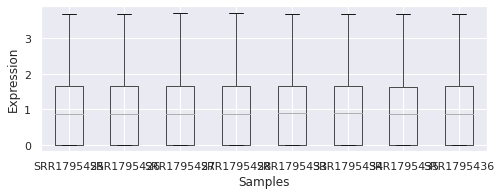

In [16]:
log_data = np.log10(data_rpm + 1)

xp.check_samples(log_data)

### Gene Scaling
- For many analyses, it is important that genes be scaled similarly in order to make their comparison compatible
- XPRESStools will perform standard scaling on gene data. This will result in each gene having a mean=0 and a standard deviation=1

In [17]:
data_scaled, data_labeled = xp.prep_data(data_rpm, metadata) 

### Prepare plotting features
- XPRESStools often gives one the option to color by sample type. Doing so requires a color palette dictionary, like the one below
- Colors can be specified using common names or using another Matplotlib-compatible format

In [18]:
colors = {'ribo_tm': (0.8705882352941177, 0.5607843137254902, 0.0196078431372549),
        'ribo_untr': (0.00784313725490196, 0.6196078431372549, 0.45098039215686275)}

# Analyzing Data

### Single-gene analysis
- Use: Explore how expression of a particular gene varies across sample types

<u><b>Plot data</b></u>
- In the example below, we use the previous data and metadata, along with the corresponding color palette
- In this example we will look at how expression of <b>ATF4</b>, a stress-responsive transcription factor
- In this example, we have also added the ```order``` argument to ensure samples are ordered as we wish

<Figure size 432x288 with 0 Axes>

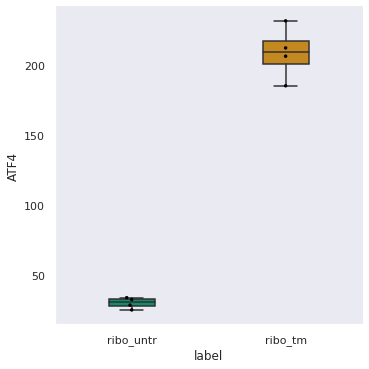

In [19]:
xp.gene_overview(data_rpm, metadata, 'ATF4', colors, order=['ribo_untr','ribo_tm'])

### Multi-gene analysis
- Use: Explore expression of a sub-set of genes of interest

<u><b>Generate gene lists</b></u>
- Gene lists can be imported or specified as a variable for later use
- This list can be modified to fit the user's specific needs

In [20]:
genes = ['ATF4',"ATF5",'DDIT3','PPP1R15A']

<u><b>Plot data</b></u>
- Next, we'll perform multi-gene analysis on a subset of genes we think might be interesting in the context of colon cancer
- In this example we will explore the expression of the genes required to form the HoxD
- It is recommended that <b>genes are uniformly scaled</b> in order to make their expression levels cross-compatible
- Lactate dehydrogenase gene products convert pyruvate to lactate and appear to show sligh up-regulation. As the mitochondrial pyruvate carrier appears to be downregulated, this makes sense, as the complex will decrease import of pyruvate into the mitochondria and lead to accumulations in the cytosol

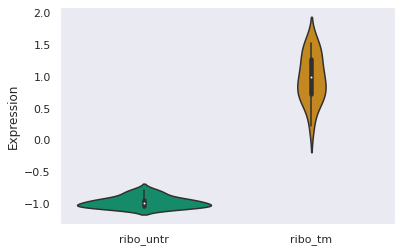

In [21]:
xp.multigene_overview(data_scaled, metadata, 
                      palette=colors,
                      gene_list=genes)

### Heatmaps
- Use: Compare a gene cohort or all genes across samples to identify expression patterns

<u><b>Prepare gene labels metadata</b></u>
- In this example, we will supply the sample metadata, as well as gene metadata to label the gene axis

In [22]:
#Set gene group color palette
gene_colors = {'ATF4': (0.5725490196078431, 0.5843137254901961, 0.5686274509803921),
                'ATF5': (0.8705882352941177, 0.5607843137254902, 0.0196078431372549)}

#Create gene group metadata
gene_groups = np.array([['ATF4','ISR'],
                  ['ATF5','ISR'],
                  ['DDIT3','ISR'],
                  ['SLC1A1','Other']])
gene_groups = pd.DataFrame({0:gene_groups[:,0],1:gene_groups[:,1]})

<u><b>Plot data</b></u>
- From this analysis, it appears that the LDH genes and the MPC genes cluster together and that these two sets of genes alone are able to cluster normal versus adenomous tissue fairly well

<Figure size 432x288 with 0 Axes>

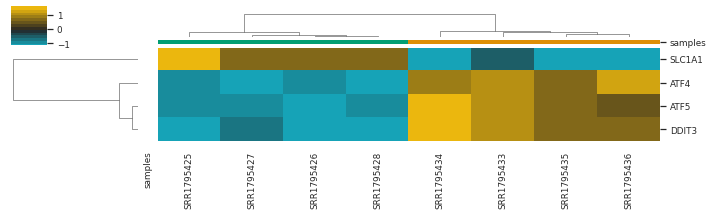

In [23]:
xp.heatmap(data_scaled, metadata, 
           sample_palette=colors, 
           gene_palette=gene_colors, gene_info=gene_groups, 
           gene_list=['ATF4','ATF5','DDIT3','SLC1A1'], 
           row_cluster=True, col_cluster=True,
           figsize=(10,3))

# Scatter Plots and Linear Regression
- Use: Plot two arrays data, such as the expression of two genes from the dataset and determine if there is a linear relationship between the two arrays 

<u><b>Plot data</b></u>
- From the previous example, it appears there is a fairly anti-correlary relationship between MPC and LDH. We would now like to quantify this relationship between two of the genes
- The linear regression states that the relationship has an r-value=```-0.48```, confirming our hypothesis of a anti-correlary relationship. The value of ```0.48``` indicates a moderate level of correlation

In [ ]:
xp.scatter(data, metadata, 'SLC1A1', 'ATF4', 
           palette=colors, 
           add_linreg=True,
           alpha=0.9,
           figsize=(4,4))

### Volcano Plots
- As RNA-Seq data is not normally distributed, we need to input properly processed data 
- We will use DESeq2 prepared data, which is accessible through `XPRESSpipe diffex`

<u><b>Plot data</b></u>
- From this analysis, while the changes in these genes are significant, they are perhaps not very large changes in expression
- Labeling the highlighted points is a two step process, as outlined in the code blocks below

In [ ]:
#We'll use this step to get the gene coordinates
xp.rna_volcano(
    './tests/test_deseq2_output.txt',
    highlight_points=[['ATF4','ATF5','DDIT3'],['SLC1A1','POMGNT1']],
    highlight_color=['green','purple'],
    y_threshold=1,
    x_threshold=[-1,1])                                      
           

# Principle Component Analysis
- Use: Deconvolute high-dimensional data

<u><b>Prepare gene set</b></u>
- Let's see how sufficient solute transporter expression levels are to delineate different sample types

In [ ]:
slc = []
slc = [x for x in data_scaled.index.tolist() if 'SLC' in x]

<u><b>Plot data</b></u>
- Let's plot the gene subset

In [ ]:
xp.pca(data_scaled, metadata, colors, 
       gene_list=slc,
       grouping='samples', #this indicates we want to compare samples
       n_components=2, # Since we have a small number of samples, we need to modify this to n_samples > n_components
       figsize=(4,4))

- We can also consider all gene expression to see how it delineates sample type
- In this case, it looks like gene expression alone is enough to cluster these samples (good thing, since they one type is cancer and the other is normal!)

In [ ]:
xp.pca(data_scaled, metadata, colors, 
       figsize=(4,4),
      n_components=2)